In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import math
from PIL import Image

In [2]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
model_path = 'model_files/face_landmarker.task'

In [ ]:
# with open('model_files/blaze_face_short_range.tflite', 'rb') as f:
#     model = f.read()
#     f.close()

In [7]:
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

In [10]:
with FaceLandmarker.create_from_options(options) as landmarker:
    mp_image = mp.Image.create_from_file('pics/me_bound.jpg')
    face_landmarker_result = landmarker.detect(mp_image)
    # print(face_landmarker_result)

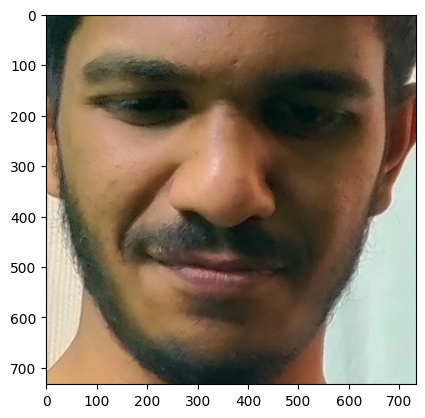

In [11]:
img = cv2.imread('pics/me_bound.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [19]:
face_landmarker_result.face_landmarks[0]

[NormalizedLandmark(x=0.4694003462791443, y=0.6629359722137451, z=-0.07131142914295197, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4758041203022003, y=0.5516949892044067, z=-0.21263720095157623, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4734207093715668, y=0.5780731439590454, z=-0.09614879637956619, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4477173686027527, y=0.39907974004745483, z=-0.18610568344593048, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4783128499984741, y=0.5092779397964478, z=-0.2340894192457199, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4812459647655487, y=0.448435515165329, z=-0.22842809557914734, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4883473217487335, y=0.2987173795700073, z=-0.15191100537776947, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.19993853569030762, y=0.251518189907074, z=0.006349659524857998, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4911978542804718, y=0.209